# Import required packages and functions

In [ ]:
# Import Funcoes file with my functions
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Adjustment


## Import csv files

The training file contains 41 attributes, one of which is the sample class in text format (e.g. teens, twenties, ...), in addition to the sample ID

The validation dataset, (validacao.csv), is the same as the training set, except that it does not contain the column indicating the sample class.

After training your model, you must classify the samples in this file (validation.csv) and generate a file called sample.csv containing a column with the sample identification (same information as column 1 of the validation file) and a second column with the name of the class that your model classified the sample into.

In [ ]:
# Importar arquivo csv como dataframe
df_treino = pd.read_csv('/content/drive/My Drive/UFMG/Pós-graduação/00.Data/TPfinal/treino.csv')
df_validacao = pd.read_csv('/content/drive/My Drive/UFMG/Reconhecimento de padrões/00.Data/TPfinal/validacao.csv')
df_sample = pd.read_csv('/content/drive/My Drive/UFMG/Reconhecimento de padrões/00.Data/TPfinal/sample.csv')

# Printar as dimensoes dos dataframes
print('Dimensoes do dataframe de treino: ', df_treino.shape)
print('Dimensoes do dataframe de validacao: ', df_validacao.shape)
print('Dimensoes do dataframe de sample: ', df_sample.shape)

# Primeiras linhas do dataframe de treino
df_treino.head()

Dimensoes do dataframe de treino:  (3500, 41)
Dimensoes do dataframe de validacao:  (1500, 40)
Dimensoes do dataframe de sample:  (1500, 2)


,id,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,y
0,0,6.564539,0.005402,-0.046048,0.082720,0.025483,0.012840,0.012074,0.015706,0.019474,...,0.004677,0.006341,0.004652,0.008265,0.001942,0.006023,0.003802,-0.006645,0.004731,teens
1,1,6.272916,-0.050610,0.079147,0.051565,0.039750,0.024608,0.007396,-0.000113,0.010413,...,0.000279,0.003451,0.004072,-0.001063,0.000887,-0.001818,0.000567,-0.004009,-0.002465,twenties
2,2,6.109420,0.149254,-0.024532,0.058759,0.024705,-0.005258,-0.011766,0.036307,-0.116146,...,-0.001559,0.002674,0.005249,-0.002725,0.000793,0.002473,0.002813,-0.004865,-0.006467,fourties
3,3,5.769757,0.118987,-0.142818,0.266039,-0.144302,0.062644,-0.036074,-0.007810,-0.059597,...,-0.004636,-0.006736,-0.009979,-0.004465,-0.007968,-0.008652,-0.008678,-0.012818,-0.003198,twenties
4,4,5.959087,0.199252,-0.126957,0.125780,-0.004105,-0.054833,-0.035830,-0.000890,-0.051578,...,-0.011336,-0.021308,-0.005701,-0.010904,-0.014085,-0.000995,-0.007513,-0.003199,-0.012306,teens


## Column transformation

Outputs in text format must be transformed into numeric format:
- teens -> 1
- twenties -> 2
- thirties -> 3
- fourties -> 4
- fifties -> 5

Additionally, the ID column will be used as the index for the rows in the dataframes.

In [ ]:
df_treino['y'] = df_treino['y'].map({'teens': 1, 'twenties': 2, 'thirties': 3, 'fourties': 4, 'fifties': 5})

# Usar coluna 'id' como index
df_treino.set_index('id', inplace=True)
df_validacao.set_index('id', inplace=True)

df_treino.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,y
id,,,,,,,,,,,,,,,,,,,,,
0,6.564539,0.005402,-0.046048,0.082720,0.025483,0.012840,0.012074,0.015706,0.019474,-0.000007,...,0.004677,0.006341,0.004652,0.008265,0.001942,0.006023,0.003802,-0.006645,0.004731,1
1,6.272916,-0.050610,0.079147,0.051565,0.039750,0.024608,0.007396,-0.000113,0.010413,-0.009690,...,0.000279,0.003451,0.004072,-0.001063,0.000887,-0.001818,0.000567,-0.004009,-0.002465,2
2,6.109420,0.149254,-0.024532,0.058759,0.024705,-0.005258,-0.011766,0.036307,-0.116146,0.001421,...,-0.001559,0.002674,0.005249,-0.002725,0.000793,0.002473,0.002813,-0.004865,-0.006467,4
3,5.769757,0.118987,-0.142818,0.266039,-0.144302,0.062644,-0.036074,-0.007810,-0.059597,0.002855,...,-0.004636,-0.006736,-0.009979,-0.004465,-0.007968,-0.008652,-0.008678,-0.012818,-0.003198,2
4,5.959087,0.199252,-0.126957,0.125780,-0.004105,-0.054833,-0.035830,-0.000890,-0.051578,-0.050316,...,-0.011336,-0.021308,-0.005701,-0.010904,-0.014085,-0.000995,-0.007513,-0.003199,-0.012306,1


# Designation of Folds


In [ ]:
# Embaralhar as linhas do dataframe
df_treino_embaralhado = df_treino.sample(frac=1)

# Designar indices com K-Folds
k = 10
df_treino_embaralhado['fold'] = 0
for i in range(k):
    df_treino_embaralhado.loc[df_treino_embaralhado.index[i::k], 'fold'] = i+1

# Verificar se os folds foram designados corretamente
df_treino_embaralhado.head(20)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X31,X32,X33,X34,X35,X36,X37,X38,y,fold
id,,,,,,,,,,,,,,,,,,,,,
829,6.078919,0.059147,-0.071367,0.030352,-0.041856,0.005368,-0.008663,-0.014627,0.008535,-0.031413,...,-0.006022,-0.002514,0.002397,-0.002043,0.007152,-0.004789,0.007708,-0.006371,4,1
278,5.425748,0.245411,-0.332351,0.274750,-0.133671,0.057665,-0.090403,0.019579,-0.028593,-0.017948,...,0.003905,-0.000936,-0.005083,0.007011,-0.005122,0.003072,0.000601,-0.009898,3,2
2707,6.349311,0.257141,-0.044028,0.110019,-0.053490,-0.012708,-0.046705,0.006793,-0.050583,-0.000123,...,-0.001268,-0.003647,-0.010880,-0.009054,-0.010807,-0.016831,-0.003350,-0.017094,4,3
2789,5.694372,0.021890,-0.060106,0.037827,-0.003732,-0.047763,-0.003251,-0.010004,-0.011456,-0.029366,...,-0.002376,-0.006217,-0.002382,0.000316,-0.001927,-0.006632,-0.003440,-0.016863,2,4
2057,6.094799,0.133280,0.107713,0.052662,0.036015,-0.051399,-0.019925,0.013977,-0.075216,0.019678,...,0.006334,-0.004149,0.018804,-0.019183,0.014203,-0.008027,-0.003026,0.003827,4,5
1057,6.370084,0.018773,0.008066,0.142074,-0.050417,0.099188,-0.058813,0.021788,-0.032470,-0.048011,...,-0.004426,-0.003820,0.001336,-0.016449,0.000008,-0.017272,-0.003741,-0.013719,3,6
2632,6.114687,0.032168,-0.005057,0.084500,-0.004901,0.060589,-0.010407,0.028656,-0.016185,-0.028107,...,-0.022842,0.002638,-0.006359,0.003939,-0.009001,-0.009999,0.000688,-0.007845,1,7
918,6.135422,0.106348,-0.067248,0.102902,0.052974,-0.051435,0.009237,0.006293,-0.013184,-0.041526,...,0.004991,-0.002670,-0.002635,-0.003076,0.004670,-0.004179,0.000595,-0.010130,2,8
3275,6.390757,-0.003308,-0.012823,0.125725,-0.076968,0.093501,-0.041979,0.041082,-0.019450,-0.032756,...,-0.001414,-0.001904,-0.002487,0.007412,-0.007109,-0.011367,-0.003590,-0.014565,3,9


# Main Loop


In [ ]:
# ====================== PARÂMETROS DO MODELO ======================
max_iter = 10
crescente = False
proporcoes = range(5, 100, 5)

proporcoes = [x/100 for x in proporcoes]

# Acuracias é um dataframe com as linhas representando as proporções e colunas representando os folds
acuracias = pd.DataFrame(index=proporcoes, columns=range(1, k+1))

# Adicionar linha ao dataframe para acuracias sem remoção de amostras (proporção 0)
acuracias.loc[0] = 0
# acuracias = np.zeros((len(proporcoes), k))

# Loop Externo variando o fold de teste
for fold_teste in range(1, k+1):

    # Separar dataframe de treino em dataframe de treino e dataframe de teste
    df_treino = df_treino_embaralhado[df_treino_embaralhado['fold'] != fold_teste]
    df_teste = df_treino_embaralhado[df_treino_embaralhado['fold'] == fold_teste]

    # Separação dos dados em treino e teste
    X_train = df_treino.drop(columns=['y', 'fold'])
    y_train = df_treino['y']
    X_test = df_teste.drop(columns=['y', 'fold'])
    y_test = df_teste['y']

    clf = RandomForestClassifier(n_estimators=100, random_state=0)

    X_train, X_test, removed_cols, acuracia_vec = prunning(X_train, y_train, X_test, y_test, clf)

    plt.plot(acuracia_vec, label="Vetor de acurácia")
    plt.legend()
    plt.show()

    print('Fold de teste: ', fold_teste)

    # Treinar o classificador
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train, y_train)

    # Fazer predições
    y_pred = clf.predict(X_test)

    # Calcular a acurácia
    from sklearn.metrics import accuracy_score
    acuracia = accuracy_score(y_test, y_pred)
    acuracias.loc[0, fold_teste] = acuracia


    # Calcular o raio de Silverman para os dataframes de idade com a função silverman_radius(data)
    r1 = silverman_radius(X1)
    print('Raio de Silverman para o dataframe X1: ', r1)
    r2 = silverman_radius(X2)
    print('Raio de Silverman para o dataframe X2: ', r2)
    r3 = silverman_radius(X3)
    print('Raio de Silverman para o dataframe X3: ', r3)
    r4 = silverman_radius(X4)
    print('Raio de Silverman para o dataframe X4: ', r4)
    r5 = silverman_radius(X5)
    print('Raio de Silverman para o dataframe X5: ', r5)

    # Loop Interno para treino do RCE
    X1_indexes = X1.index
    X2_indexes = X2.index
    X3_indexes = X3.index
    X4_indexes = X4.index
    X5_indexes = X5.index
    all_X1_novelty = []
    all_X2_novelty = []
    all_X3_novelty = []
    all_X4_novelty = []
    all_X5_novelty = []
    for iter in range(max_iter):
        print(f'\nIteração {iter+1} / 10\n')

        # Embaralhar antes de aplicar RCE
        X1_embaralhado = X1.sample(frac=1)
        X2_embaralhado = X2.sample(frac=1)
        X3_embaralhado = X3.sample(frac=1)
        X4_embaralhado = X4.sample(frac=1)
        X5_embaralhado = X5.sample(frac=1)

        # Treino do RCE
        prototypes_X1 = rce_training(training_vectors = X1_embaralhado, influence_radius = r1)
        prototypes_X2 = rce_training(training_vectors = X2_embaralhado, influence_radius = r2)
        prototypes_X3 = rce_training(training_vectors = X3_embaralhado, influence_radius = r3)
        prototypes_X4 = rce_training(training_vectors = X4_embaralhado, influence_radius = r4)
        prototypes_X5 = rce_training(training_vectors = X5_embaralhado, influence_radius = r5)

        # Número de protótipos selecionados
        # print(f'Número de protótipos selecionados para o dataframe teens: {len(prototypes_X1)} / {len(X1_embaralhado)}')

        # Teste do RCE
        X1_novelty = rce_testing(testing_vectors = X1, prototypes = prototypes_X1)
        all_X1_novelty.append(X1_novelty)
        X2_novelty = rce_testing(testing_vectors = X2, prototypes = prototypes_X2)
        all_X2_novelty.append(X2_novelty)
        X3_novelty = rce_testing(testing_vectors = X3, prototypes = prototypes_X3)
        all_X3_novelty.append(X3_novelty)
        X4_novelty = rce_testing(testing_vectors = X4, prototypes = prototypes_X4)
        all_X4_novelty.append(X4_novelty)
        X5_novelty = rce_testing(testing_vectors = X5, prototypes = prototypes_X5)
        all_X5_novelty.append(X5_novelty)

    X1_novelty_mean = sum(all_X1_novelty)/len(all_X1_novelty)
    X1_novelty_mean.index = X1_indexes
    X2_novelty_mean = sum(all_X2_novelty)/len(all_X2_novelty)
    X2_novelty_mean.index = X2_indexes
    X3_novelty_mean = sum(all_X3_novelty)/len(all_X3_novelty)
    X3_novelty_mean.index = X3_indexes
    X4_novelty_mean = sum(all_X4_novelty)/len(all_X4_novelty)
    X4_novelty_mean.index = X4_indexes
    X5_novelty_mean = sum(all_X5_novelty)/len(all_X5_novelty)
    X5_novelty_mean.index = X5_indexes

    # Ordenar amostras por novidade de forma crescente ou decrescente
    X1_novelty_ordered = X1_novelty_mean.sort_values(ascending=crescente, by=X1_novelty_mean.columns[0])
    X2_novelty_ordered = X2_novelty_mean.sort_values(ascending=crescente, by=X2_novelty_mean.columns[0])
    X3_novelty_ordered = X3_novelty_mean.sort_values(ascending=crescente, by=X3_novelty_mean.columns[0])
    X4_novelty_ordered = X4_novelty_mean.sort_values(ascending=crescente, by=X4_novelty_mean.columns[0])
    X5_novelty_ordered = X5_novelty_mean.sort_values(ascending=crescente, by=X5_novelty_mean.columns[0])

    # Loop de remoção de amostras
    for proporcao in proporcoes:
        # print(f'\nProporção de amostras a serem removidas: {proporcao}')

        num_amostras_X1 = int(len(X1_novelty_ordered)*proporcao)
        num_amostras_X2 = int(len(X2_novelty_ordered)*proporcao)
        num_amostras_X3 = int(len(X3_novelty_ordered)*proporcao)
        num_amostras_X4 = int(len(X4_novelty_ordered)*proporcao)
        num_amostras_X5 = int(len(X5_novelty_ordered)*proporcao)

        # Indices das amostras a serem removidas
        X1_to_remove = X1_novelty_ordered[:num_amostras_X1].index
        X2_to_remove = X2_novelty_ordered[:num_amostras_X2].index
        X3_to_remove = X3_novelty_ordered[:num_amostras_X3].index
        X4_to_remove = X4_novelty_ordered[:num_amostras_X4].index
        X5_to_remove = X5_novelty_ordered[:num_amostras_X5].index

        # # Printar quantidade de amostras a serem removidas
        # print(f'{num_amostras_X1} / {X1.shape[0]} amostras a serem removidas do dataframe teens')
        # print(f'{num_amostras_X2} / {X2.shape[0]} amostras a serem removidas do dataframe twenties')
        # print(f'{num_amostras_X3} / {X3.shape[0]} amostras a serem removidas do dataframe thirties')
        # print(f'{num_amostras_X4} / {X4.shape[0]} amostras a serem removidas do dataframe fourties')
        # print(f'{num_amostras_X5} / {X5.shape[0]} amostras a serem removidas do dataframe fifties')

        # Remover amostras dos dataframes
        X1_reduced = X1.drop(X1_to_remove)
        y1_reduced = y1.drop(X1_to_remove)
        X2_reduced = X2.drop(X2_to_remove)
        y2_reduced = y2.drop(X2_to_remove)
        X3_reduced = X3.drop(X3_to_remove)
        y3_reduced = y3.drop(X3_to_remove)
        X4_reduced = X4.drop(X4_to_remove)
        y4_reduced = y4.drop(X4_to_remove)
        X5_reduced = X5.drop(X5_to_remove)
        y5_reduced = y5.drop(X5_to_remove)



        # Concatenar os dataframes
        X_train = pd.concat([X1_reduced, X2_reduced, X3_reduced, X4_reduced, X5_reduced])
        y_train = pd.concat([y1_reduced, y2_reduced, y3_reduced, y4_reduced, y5_reduced])

        # # Dividir os dados em treino e teste
        # from sklearn.model_selection import train_test_split
        # X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=0)

        # Treinar o classificador
        from sklearn.ensemble import RandomForestClassifier
        clf = RandomForestClassifier(n_estimators=100, random_state=0)
        clf.fit(X_train, y_train)

        # Fazer predições
        y_pred = clf.predict(X_test)

        # Calcular a acurácia
        from sklearn.metrics import accuracy_score
        acuracia = accuracy_score(y_test, y_pred)
        # print('Acurácia: ', acuracia)
        # acuracias[proporcoes.index(proporcao), fold_teste-1] = acuracia
        acuracias.loc[proporcao, fold_teste] = acuracia

        # # Calcular a matriz de confusão
        # from sklearn.metrics import confusion_matrix
        # cm = confusion_matrix(y_test, y_pred)
        # print(cm)

SyntaxError: ignored

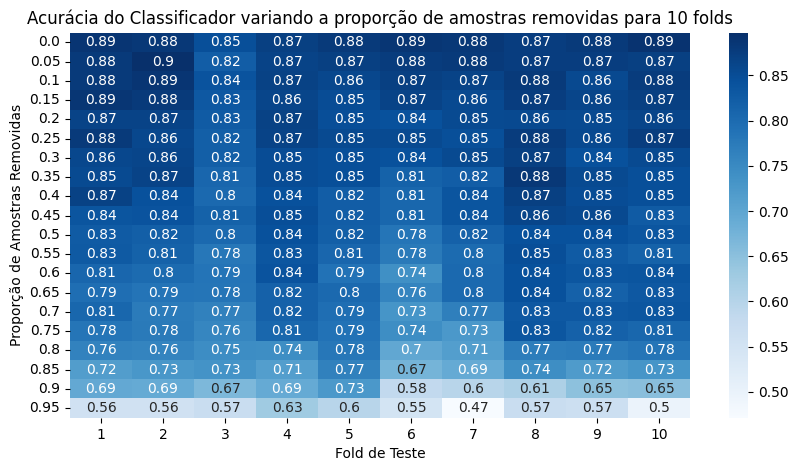

In [ ]:
# Plotar dataframe em um mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)

# Convert the data in acuracias dataframe to float
acuracias = acuracias.sort_index()

sns.heatmap(acuracias, annot=True, cmap='Blues')
plt.xlabel('Fold de Teste')
plt.ylabel('Proporção de Amostras Removidas')
plt.title('Acurácia do Classificador variando a proporção de amostras removidas para 10 folds')
plt.show()


# Plot the results


In [ ]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

def silverman_radius(data):
    '''Calcula o raio de Silverman

    Input:
            data --> dataframe com os dados \n

    Output:
            radius --> float com o raio resultante \n
    '''
    # N é o numero de amostras
    N = len(data)
    # Flatten the dataframe into a 1D array
    data_flattened = data.values.flatten()
    # sd é o desvio padrão das amostras
    sd = np.std(data_flattened)
    # h é o raio de Silverman
    radius = 1.06 * sd * N ** (-1 / 5)

    return radius

def rce_training(training_vectors, influence_radius):
    '''Treina o modelo de detecção de drift RCE (Reduced Coulomb Energy) a partir de um vetor de treinamento e um raio de influência

    Input:
            training_vectors --> dataframe com os vetores de treinamento do modelo \n
            influence_radius --> float especificando o raio de influência do algoritmo \n

    Output:
            prototypes_df --> dataframe com os protótipos encontrados no treinamento \n
    '''
    prototypes = []
    training_vectors_array = training_vectors.to_numpy()

    # Encontrar protótipos
    print("Selecionando protótipos...")
    for vector in tqdm(training_vectors_array):
        found_prototype = False

        # Verifica se o vetor está dentro do raio de influência de algum protótipo existente
        for prototype in prototypes:
            if np.linalg.norm(vector - prototype) <= influence_radius:
                found_prototype = True
                break

        if not found_prototype:
            # Cria um novo protótipo para o vetor
            prototypes.append(vector)

    prototypes_df = pd.DataFrame(prototypes, columns=training_vectors.columns)
    return prototypes_df

def rce_testing(testing_vectors, prototypes):
    '''Treina o modelo de detecção de drift RCE (Reduced Coulomb Energy) a partir de um vetor de treinamento e um raio de influência

    Input:
            testing_vectors --> dataframe com os vetores de teste do modelo \n
            prototypes --> dataframe com os protótipos encontrados no treinamento \n

    Output:
            novelty_df --> dataframe com a curva de novidade encontrada aplicando o RCE treinado aos vetores de teste \n
    '''
    novelty_vector = []  # Lista para armazenar o índice de novidade
    testing_vectors_array = testing_vectors.to_numpy()
    prototypes_array = prototypes.to_numpy()

    print("Avaliando vetores de teste...")
    for vector in tqdm(testing_vectors_array):
        min_distance = np.inf

        # Calcula a menor distância entre o vetor de teste e os protótipos
        for prototype in prototypes_array:
            distance = np.linalg.norm(vector - prototype)
            if distance < min_distance:
                min_distance = distance

        novelty_vector.append(min_distance)

    novelty_df = pd.DataFrame(novelty_vector, columns=["Novelty"])
    return novelty_df

def prunning(X_train, y_train, X_test, y_test, clf):

  acuracia_vec = []

  removed_cols = []

  clf.fit(X_train, y_train)

  # Fazer predições
  y_pred = clf.predict(X_test)

  # Calcular a acurácia
  acuracia = accuracy_score(y_test, y_pred)

  acuracia_vec.append(acuracia)

  num_col = X_train.shape[1]


  for i in range(0,num_col-1):

    X_train_aux = X_train.copy()
    X_test_aux = X_test.copy()

    #zera a coluna
    X_train_aux[X_train_aux.columns[i]] = 0
    X_test_aux[X_test_aux.columns[i]] = 0

    clf.fit(X_train_aux, y_train)

    # Fazer predições
    y_pred = clf.predict(X_test_aux)

    # Calcular a acurácia
    acuracia_aux = accuracy_score(y_test, y_pred)

    acuracia_vec.append(acuracia_aux)

    if acuracia < acuracia_aux:
      removed_cols.append(i)
      X_train = X_train_aux
      X_test = X_test_aux
      acuracia = acuracia_aux

  return X_train, X_test, removed_cols, acuracia_vec, acuracia

39
Melhor acuracia: 0.9057142857142857
Colunas Removidas: [9, 32]


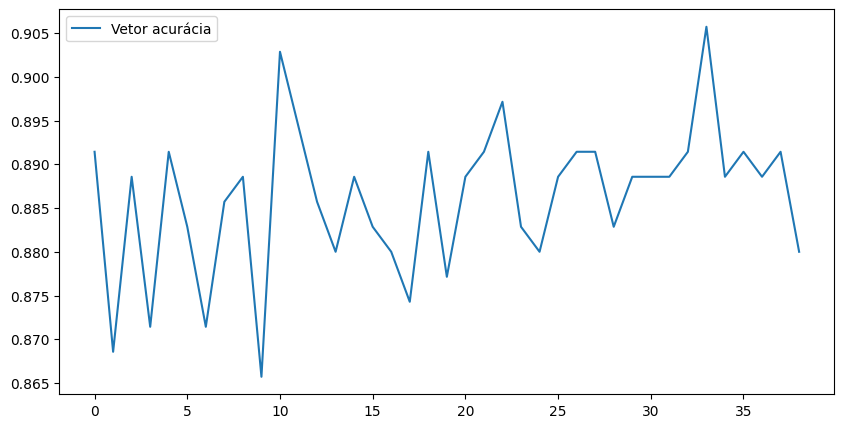

39
Melhor acuracia: 0.9114285714285715
Colunas Removidas: [2, 15, 23]


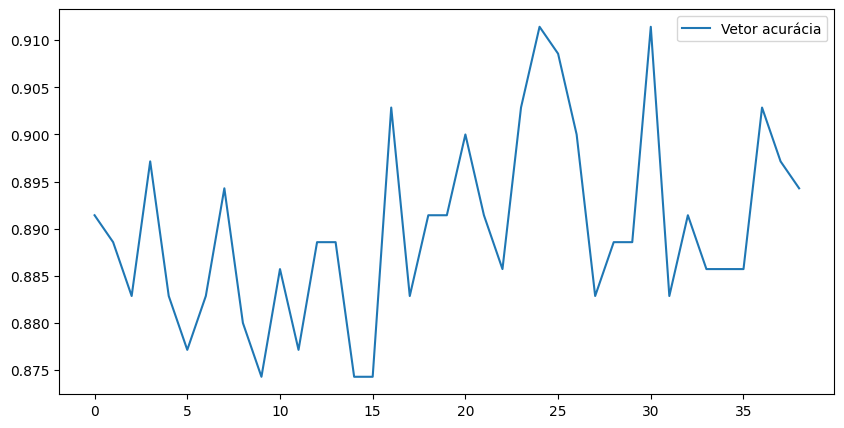

39
Melhor acuracia: 0.86
Colunas Removidas: [0, 1, 7]


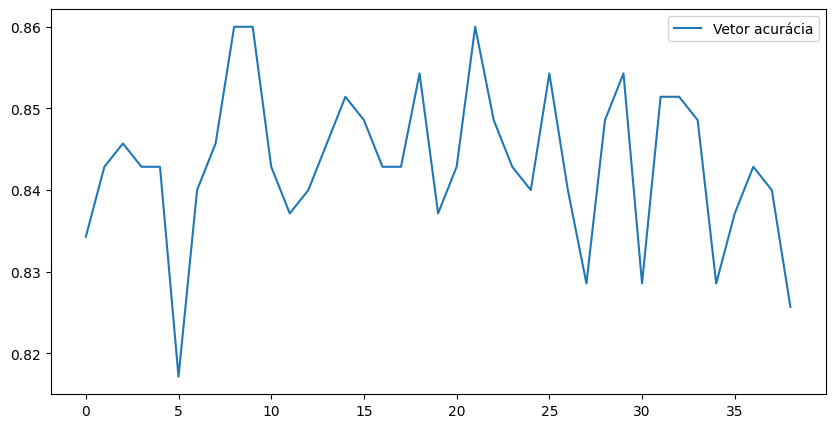

39
Melhor acuracia: 0.88
Colunas Removidas: [1, 9, 12, 23]


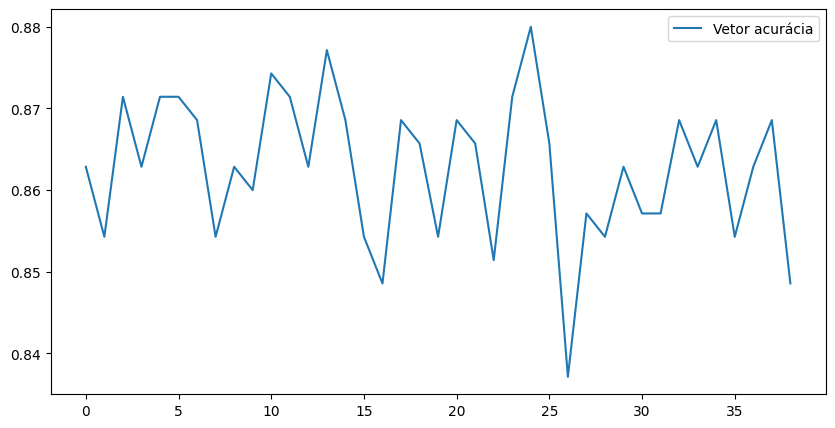

39
Melhor acuracia: 0.88
Colunas Removidas: [9]


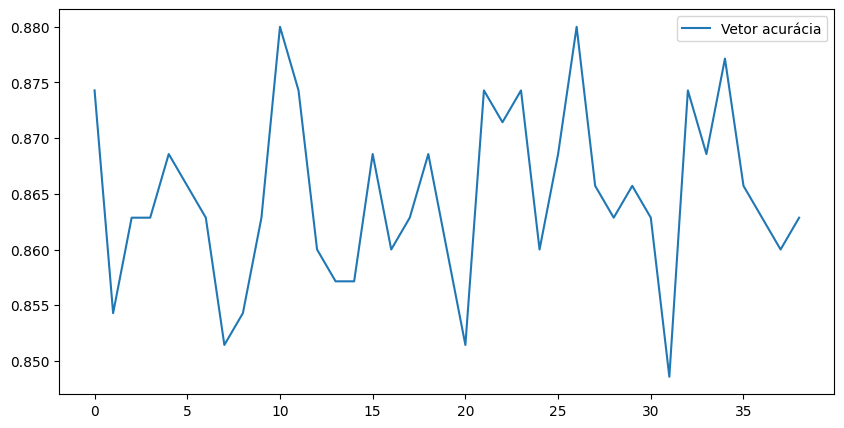

39
Melhor acuracia: 0.9028571428571428
Colunas Removidas: [7]


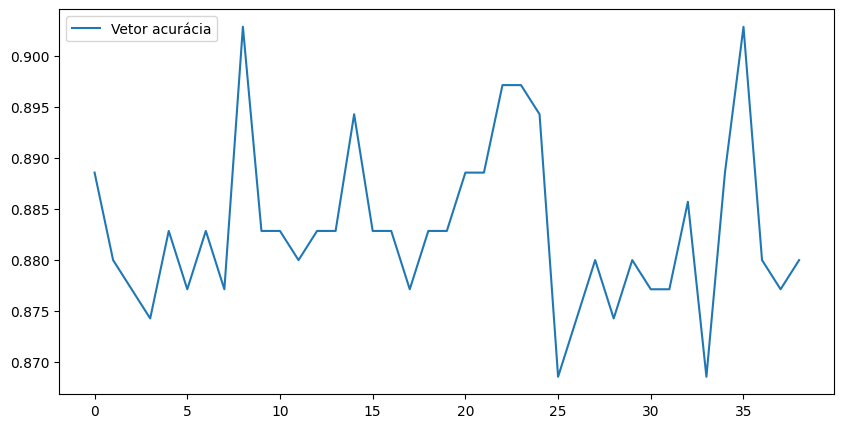

39
Melhor acuracia: 0.9028571428571428
Colunas Removidas: [7]


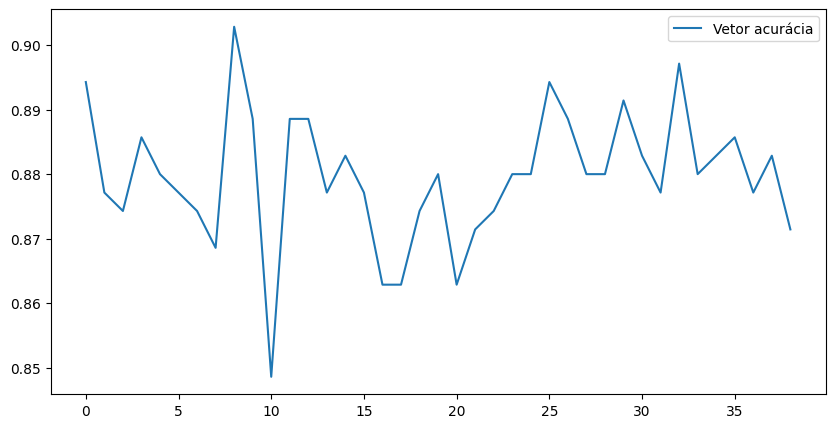

39
Melhor acuracia: 0.9028571428571428
Colunas Removidas: [3, 20]


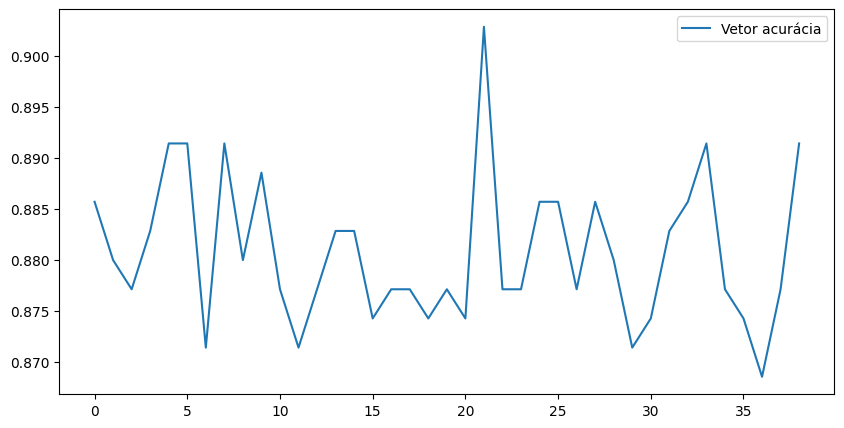

39
Melhor acuracia: 0.9
Colunas Removidas: [6, 11, 18]


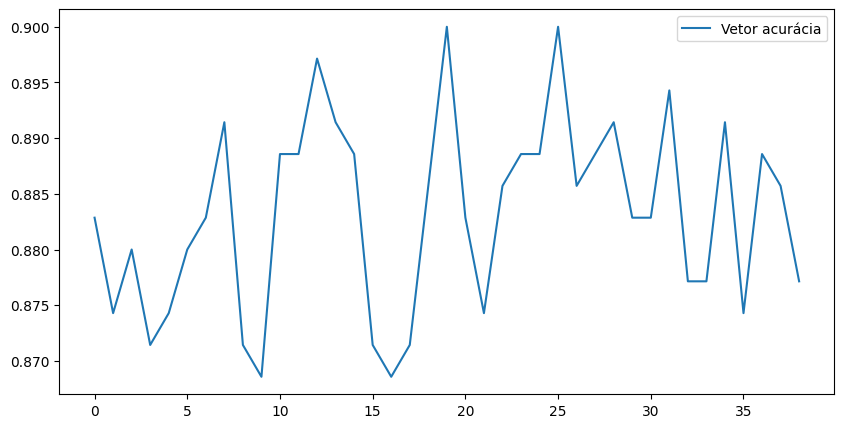

39
Melhor acuracia: 0.8885714285714286
Colunas Removidas: [0]


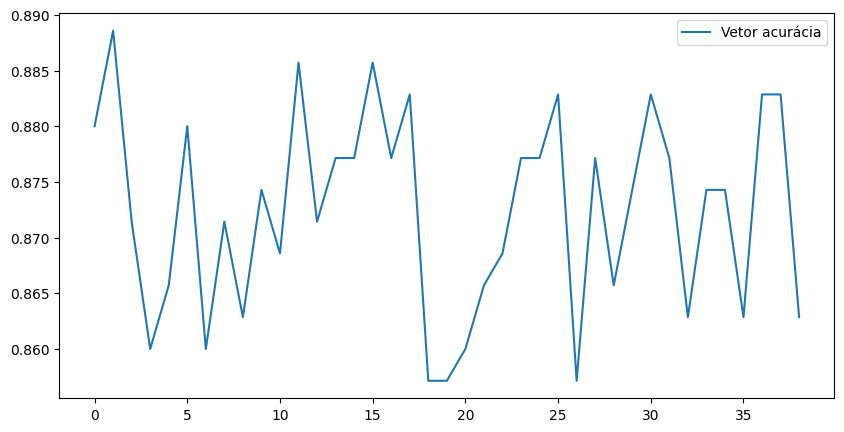

In [ ]:
for fold_teste in range(1, k+1):

    # Separar dataframe de treino em dataframe de treino e dataframe de teste
    df_treino = df_treino_embaralhado[df_treino_embaralhado['fold'] != fold_teste]
    df_teste = df_treino_embaralhado[df_treino_embaralhado['fold'] == fold_teste]

    # Separação dos dados em treino e teste
    X_train = df_treino.drop(columns=['y', 'fold'])
    y_train = df_treino['y']
    X_test = df_teste.drop(columns=['y', 'fold'])
    y_test = df_teste['y']

    clf = RandomForestClassifier(n_estimators=100, random_state=0)

    X_train, X_test, removed_cols, acuracia_vec, acuracia = prunning(X_train, y_train, X_test, y_test, clf)

    print(f'Melhor acuracia: {acuracia}\nColunas Removidas: {removed_cols}')
    plt.plot(acuracia_vec, label="Vetor acurácia")
    plt.legend()
    plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ====================== PARÂMETROS DO MODELO ======================
max_iter = 10
crescente = False
k_values = range(1, 10)

# Acuracias é um dataframe com as linhas representando as proporções e colunas representando os folds
acuracias = pd.DataFrame(index=k_values, columns=range(1, k+1))

# Loop Externo variando o fold de teste
for fold_teste in range(1, k+1):
    print(f'Fold de teste: {fold_teste} / {k}')

    # Separar dataframe de treino em dataframe de treino e dataframe de teste
    df_treino = df_treino_embaralhado[df_treino_embaralhado['fold'] != fold_teste]
    df_teste = df_treino_embaralhado[df_treino_embaralhado['fold'] == fold_teste]

    # Separação dos dados em treino e teste
    X_train = df_treino.drop(columns=['y', 'fold'])
    y_train = df_treino['y']
    X_test = df_teste.drop(columns=['y', 'fold'])
    y_test = df_teste['y']

    # Loop de remoção de amostras
    for i in k_values:

        # Treinar o classificador Bayesiano
        clf = KNeighborsClassifier(n_neighbors = i)

        X_train, X_test, removed_cols, acuracia_vec, acuracia = prunning(X_train, y_train, X_test, y_test, clf)

        print(f'k:{i} Acuracia Original: {np.round(acuracia_vec[0], 2)} Melhor acuracia: {np.round(acuracia, 2)} Colunas Removidas: {removed_cols}')

Fold de teste: 1 / 10
k:1 Acuracia Original: 0.86 Melhor acuracia: 0.9 Colunas Removidas: [0, 4]
k:2 Acuracia Original: 0.86 Melhor acuracia: 0.89 Colunas Removidas: [1, 5, 13]
k:3 Acuracia Original: 0.88 Melhor acuracia: 0.91 Colunas Removidas: [3, 11, 34]
k:4 Acuracia Original: 0.87 Melhor acuracia: 0.88 Colunas Removidas: [2, 19, 23, 24]
k:5 Acuracia Original: 0.86 Melhor acuracia: 0.88 Colunas Removidas: [7, 17, 20, 32]
k:6 Acuracia Original: 0.86 Melhor acuracia: 0.86 Colunas Removidas: [15]
k:7 Acuracia Original: 0.83 Melhor acuracia: 0.85 Colunas Removidas: [12, 35]
k:8 Acuracia Original: 0.83 Melhor acuracia: 0.83 Colunas Removidas: []
k:9 Acuracia Original: 0.83 Melhor acuracia: 0.83 Colunas Removidas: []
Fold de teste: 2 / 10
k:1 Acuracia Original: 0.85 Melhor acuracia: 0.94 Colunas Removidas: [0, 1, 3]
k:2 Acuracia Original: 0.92 Melhor acuracia: 0.93 Colunas Removidas: [5, 27, 30]
k:3 Acuracia Original: 0.91 Melhor acuracia: 0.93 Colunas Removidas: [2, 4, 8, 15, 36, 37]
k:4